In [ ]:
!pip install pandas
!pip install matplotlib

In [ ]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

df = pd.DataFrame()

for file in pathlib.Path("logs").iterdir():
    df = pd.concat([df, pd.read_csv(file, names=['timestamp', 'type', 'endpoint', 'method', 'query', 'status', 'duration', 'operation'], parse_dates=['timestamp'])])

df['duration'] = pd.to_numeric(df['duration'], errors='coerce') 
df_responses = df[df['type'] == 'response'] 

df_responses['endpoint'] = df_responses['endpoint'].str.replace('http://nginx-1/', '').str.replace('http://nginx-2/', '')
df_responses['endpoint_combined'] = df_responses['endpoint'].apply(lambda x: x.split('?')[0])

total_time = (df_responses['timestamp'].max() - df_responses['timestamp'].min()).total_seconds()
rps_combined = df_responses.groupby('endpoint_combined')['timestamp'].count() / total_time
total_requests_per_combined_endpoint = df_responses.groupby('endpoint_combined')['timestamp'].count()


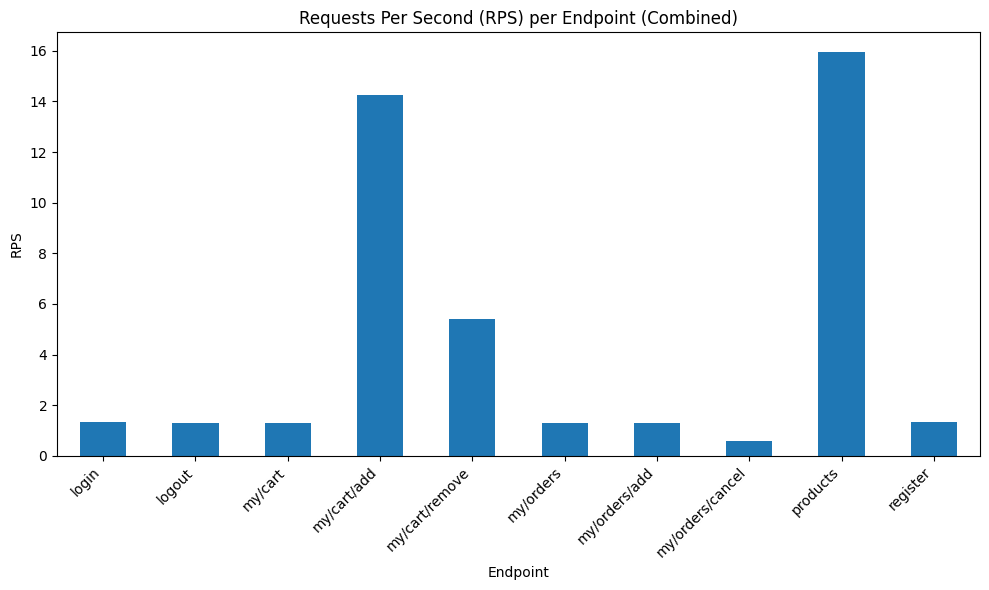

In [3]:
plt.figure(figsize=(10, 6))
rps_combined.plot(kind='bar')
plt.title('Requests Per Second (RPS) per Endpoint (Combined)')
plt.xlabel('Endpoint')
plt.ylabel('RPS')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

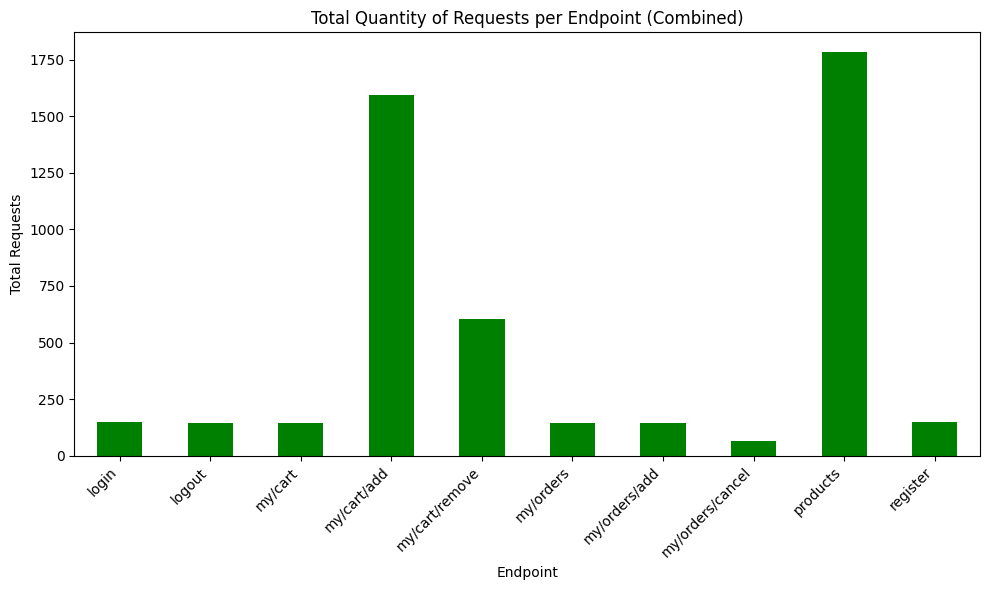

In [4]:
plt.figure(figsize=(10, 6))
total_requests_per_combined_endpoint.plot(kind='bar', color='green')
plt.title('Total Quantity of Requests per Endpoint (Combined)')
plt.xlabel('Endpoint')
plt.ylabel('Total Requests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
metrics_summary = pd.DataFrame({
    'RPS': rps_combined,
    'Total Requests': total_requests_per_combined_endpoint
}).reset_index()

print("Metrics Summary:")
metrics_summary

Metrics Summary:


,endpoint_combined,RPS,Total Requests
0,login,1.332937,149
1,logout,1.297154,145
2,my/cart,1.297154,145
3,my/cart/add,14.268689,1595
4,my/cart/remove,5.385424,602
5,my/orders,1.297154,145
6,my/orders/add,1.297154,145
7,my/orders/cancel,0.572537,64
8,products,15.932624,1781
9,register,1.341883,150
